In [1]:
# Loads the autoreload extension in Notebook
%load_ext autoreload
# Sets the autoreload mode to reload all modules before executing code
%autoreload 2

In [2]:
import numpy as np
from caits.loading import wav_specs_check
from caits.visualization import plot_signal, export_fig
from caits.visualization import plot_spectrogram, plot_simple_spectrogram
from caits.fe import amplitude_to_db, power_to_db
from utils import load_wav_instance

In [3]:
audio = load_wav_instance(path="data/yes.wav", return_vector=True)

1


In [4]:
# Load audio file
y = audio["signal"]
sr = audio["sr"]
print(f"y: {y.shape}, sr: {sr}")

y: (16000,), sr: 16000


In [5]:
audio_params = wav_specs_check("data/yes.wav")
audio_params

{'nchannels': 1,
 'sampwidth': 2,
 'framerate': 16000,
 'nframes': 16000,
 'comptype': 'NONE',
 'compname': 'not compressed'}

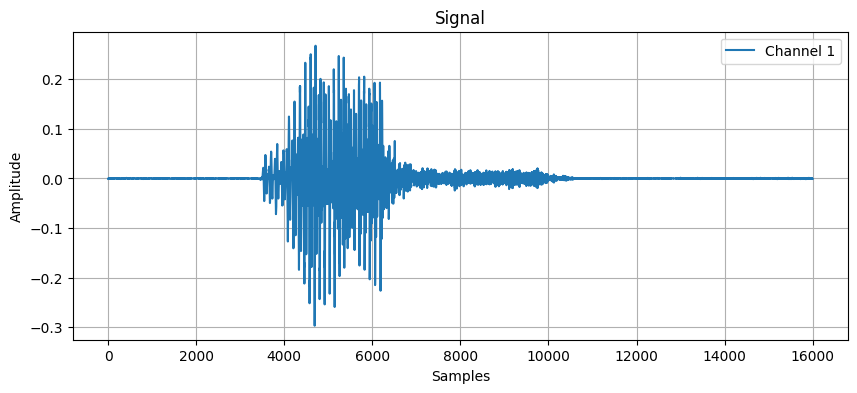

In [6]:
plot_signal(y, sr, return_mode=False)

# Definitions

In [7]:
FRAME_SIZE = 2048
HOP_LENGTH = 128
N_MELS = 128
LOWER_FREQ = 80
UPPER_FREQ = 1000

# Calculate the STFT

The STFT is a complex-valued matrix, where each column represents the Fourier transform of a short segment of the signal. We use the `stft` function from the `caits.fe` module to compute the STFT of the signal.

In [8]:
from caits.fe import stft

In [9]:
# Compute the short-time Fourier transform (STFT) of the audio signal
D = stft(y, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)

In [10]:
D.shape

(1025, 126)

In [11]:
D.min()

(-41.118249000537446+8.501203972333771j)

In [12]:
D.max()

(35.379320071753426+7.246989408294188j)

# Calculate from the spectrum the time, sample, and frequency axis

In [13]:
from caits.convert import times_like, samples_like
from caits.fe import fft_frequencies

In [14]:
# Time axis
times = times_like(D, sr=sr, hop_length=HOP_LENGTH, n_fft=FRAME_SIZE)
# Sample axis
samples = samples_like(D, hop_length=HOP_LENGTH, n_fft=FRAME_SIZE)
# Frequency axis
frequencies = fft_frequencies(sr=sr, n_fft=FRAME_SIZE)

In [15]:
type(times), type(samples), type(frequencies)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [16]:
times.shape, samples.shape

((126,), (126,))

# Calculate Amplitude Spectrogram and Power Spectrogram

The most common method to calculate a spectrogram involves using the Short-Time Fourier Transform (STFT). Then, we have to calculate the Magnitude (or Power) Spectrum: Typically, only the magnitude of the DFT coefficients is used for the spectrogram. Sometimes, the power spectrum (magnitude squared) is calculated. This represents the strength of each frequency in that particular time segment.

In `caits`, we can create the spectrogram in two ways:
1. Using the absolute values of the STFT, which is the magnitude spectrum (by exploiting the `np.abs` function), and then to the power spectrum (by squaring the absolute values).
   - `S = np.abs(D)`
   - `S_pow = np.abs(D) ** 2`
2. Or by using directly the `caits.fe.spectrogram` function, which computes the magnitude spectrum and the power spectrum.

### Using the absolute values (magnitude) of the STFT

In [17]:
S = np.abs(D)

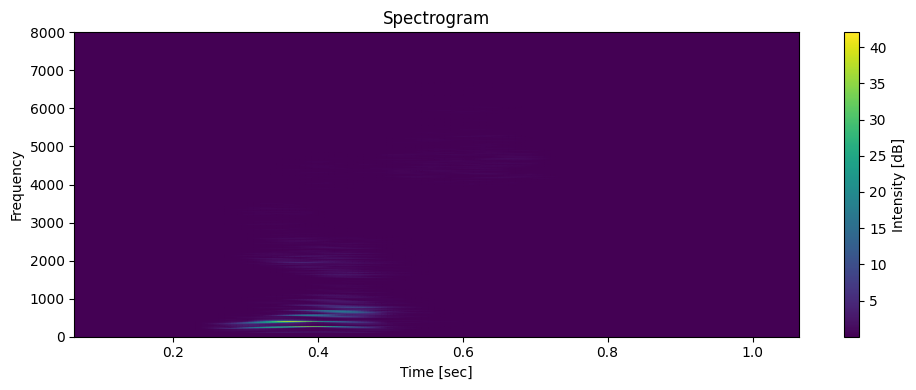

In [18]:
fig_S_abs_times = plot_spectrogram(
    f=frequencies,
    x=times,
    spec=S,
    x_axis_name="time",
    return_mode=True
)

export_fig(fig_S_abs_times, export="show")

### Transforming the absolute values to power spectrum

In [19]:
S_pow = np.abs(D) ** 2

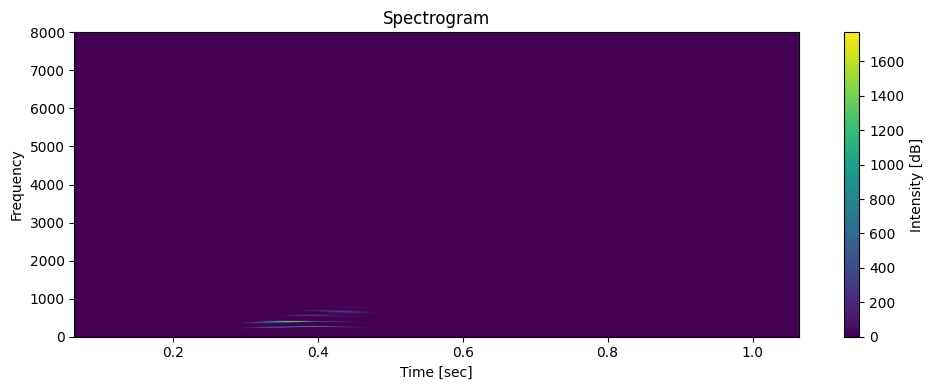

In [20]:
fig_S_pow_times = plot_spectrogram(
    f=frequencies,
    x=times,
    spec=S_pow,
    x_axis_name="time",
    return_mode=True
)

export_fig(fig_S_pow_times, export="show")

## Using the `caits.fe.spectrogram` function directly

### Calculating Amplitude Spectrogram


In [21]:
from caits.fe import spectrogram

In [22]:
S_caits, _ = spectrogram(
    y=y,
    n_fft=FRAME_SIZE,
    hop_length=HOP_LENGTH,
    power=1
)

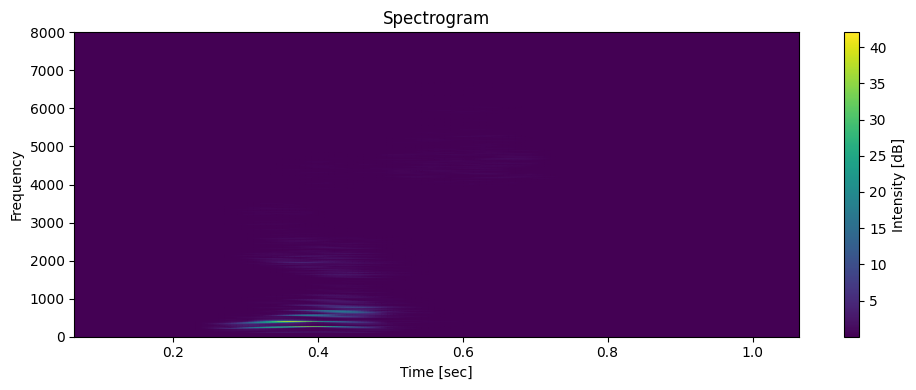

In [23]:
fig_S_abs_times_caits = plot_spectrogram(
    f=frequencies,
    x=times,
    spec=S_caits,
    x_axis_name="time",
    return_mode=True
)

export_fig(fig_S_abs_times_caits, export="show")

### Calculating the Power Spectrogram

In [24]:
S_pow_caits, _ = spectrogram(
    y=y,
    n_fft=FRAME_SIZE,
    hop_length=HOP_LENGTH,
    power=2
)

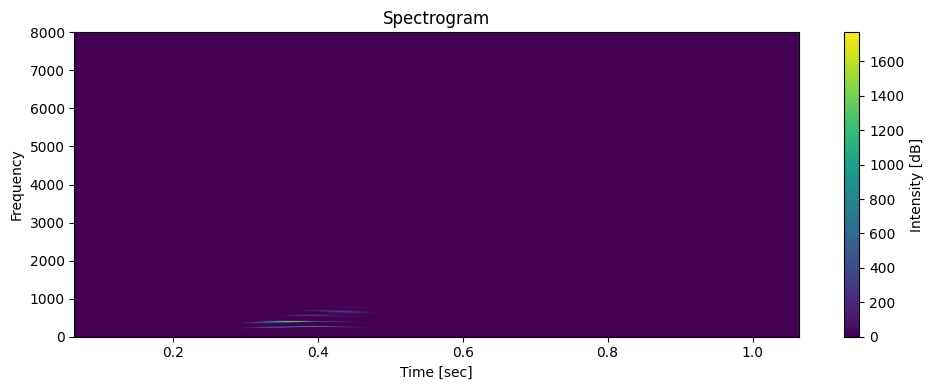

In [25]:
fig_S_pow_times_caits = plot_spectrogram(
    f=frequencies,
    x=times,
    spec=S_pow_caits,
    x_axis_name="time",
    return_mode=True
)

export_fig(fig_S_pow_times_caits, export="show")

# Transform from Amplitude Spectrogram to dB scale and from Power Spectrogram to dB scale
   - `S_db = amplitude_to_db(S, ref=np.max)`
   - `S_pow_db = power_to_db(S_pow, ref=np.max)`

Amplitude Spectrogram to dB scale

In [26]:
S_db = amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 126)

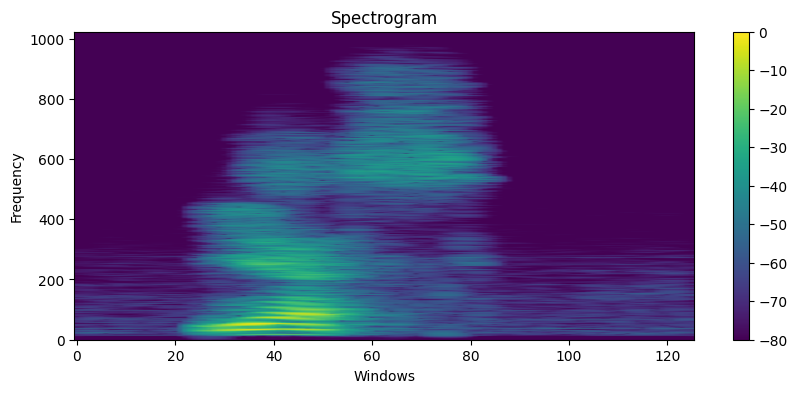

In [27]:
plot_simple_spectrogram(S_db)

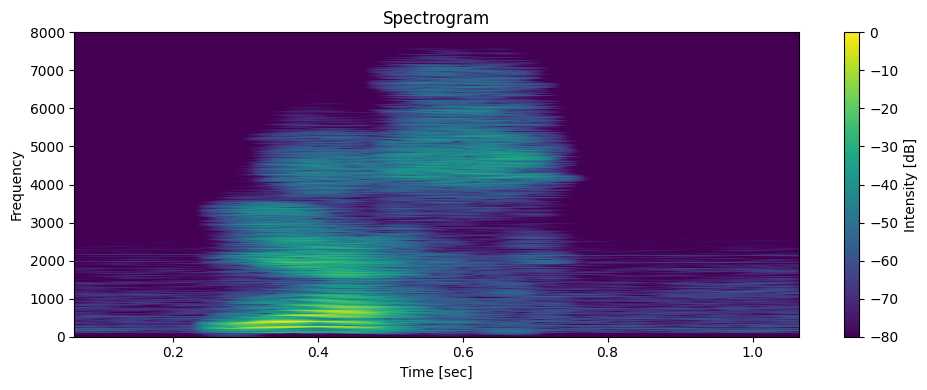

In [28]:
fig_S_db = plot_spectrogram(
    f=frequencies,
    x=times,
    spec=S_db,
    x_axis_name="time",
    return_mode=True
)

export_fig(fig_S_db, export="show")

Power Spectrogram to dB scale

In [29]:
S_pow_db = power_to_db(np.abs(D))
S_pow_db.shape

(1025, 126)

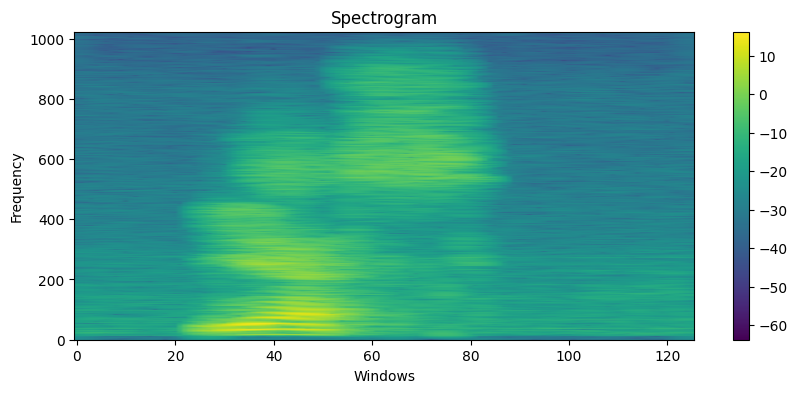

In [30]:
plot_simple_spectrogram(S_pow_db)

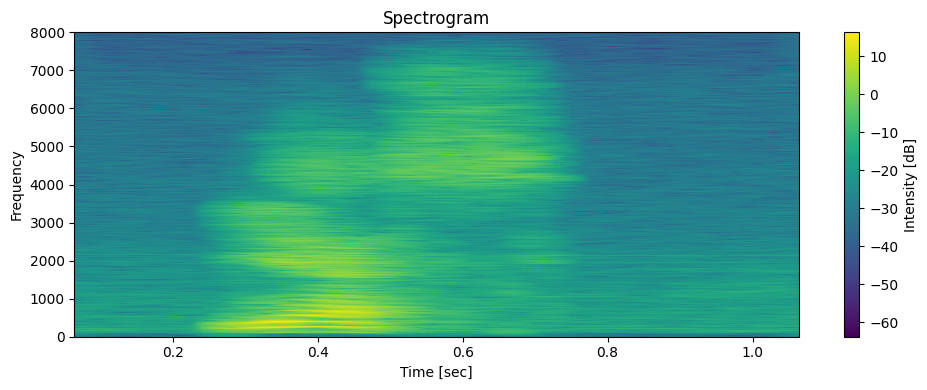

In [31]:
fig_S_pow_db = plot_spectrogram(
    f=frequencies,
    x=times,
    spec=S_pow_db,
    x_axis_name="time",
    return_mode=True
)

export_fig(fig_S_pow_db, export="show")

# Transform from Amplitude Spectrogram to dB scale and from Power Spectrogram to dB scale using `caits`


In [32]:
S_db_caits = amplitude_to_db(S_caits, ref=np.max)

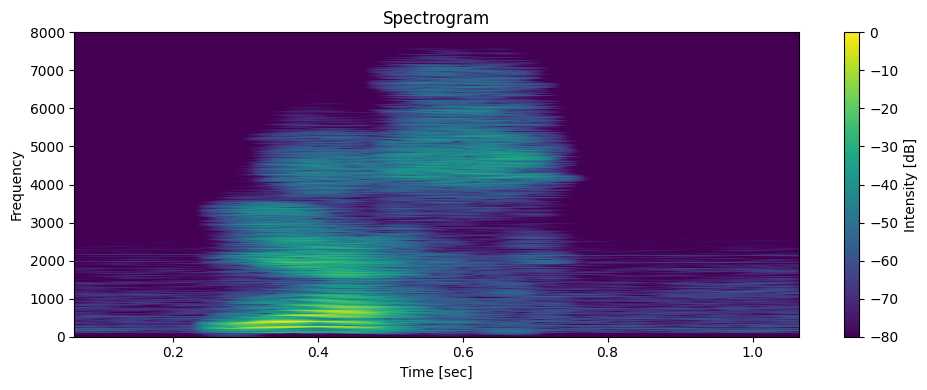

In [33]:
fig_S_db_caits = plot_spectrogram(
    f=frequencies,
    x=times,
    spec=S_db_caits,
    x_axis_name="time",
    return_mode=True
)

export_fig(fig_S_db_caits, export="show")

In [34]:
S_pow_db_caits = power_to_db(S_pow_caits, ref=np.max)

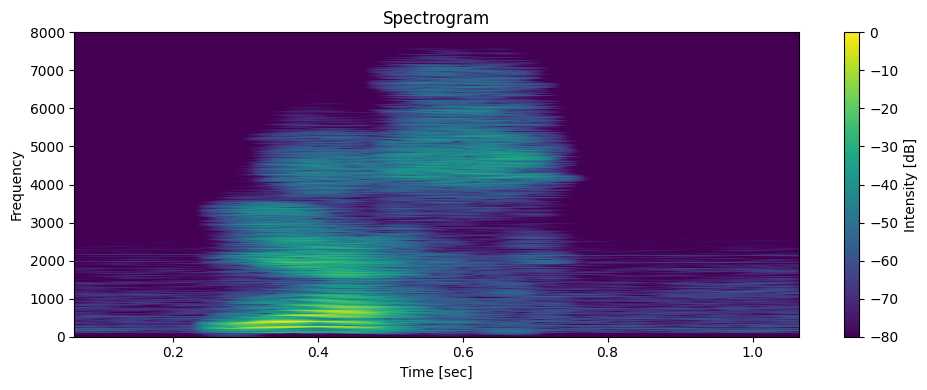

In [35]:
fig_S_pow_db_caits = plot_spectrogram(
    f=frequencies,
    x=times,
    spec=S_db_caits,
    x_axis_name="time",
    return_mode=True
)

export_fig(fig_S_pow_db_caits, export="show")

# dB-scaled Amplitude Spectrogram with time or samples displayed on the x axis, respectively

In [36]:
from caits.convert import times_like, samples_like
from caits.fe import fft_frequencies
from caits.visualization import plot_spectrogram

# Time axis
times = times_like(S_db, sr=sr, hop_length=HOP_LENGTH, n_fft=FRAME_SIZE)
# Sample axis
samples = samples_like(S_db, hop_length=HOP_LENGTH, n_fft=FRAME_SIZE)
# Frequency axis
frequencies = fft_frequencies(sr=sr, n_fft=FRAME_SIZE)

In [37]:
type(times), type(frequencies)

(numpy.ndarray, numpy.ndarray)

In [38]:
times.shape, samples.shape, frequencies.shape

((126,), (126,), (1025,))

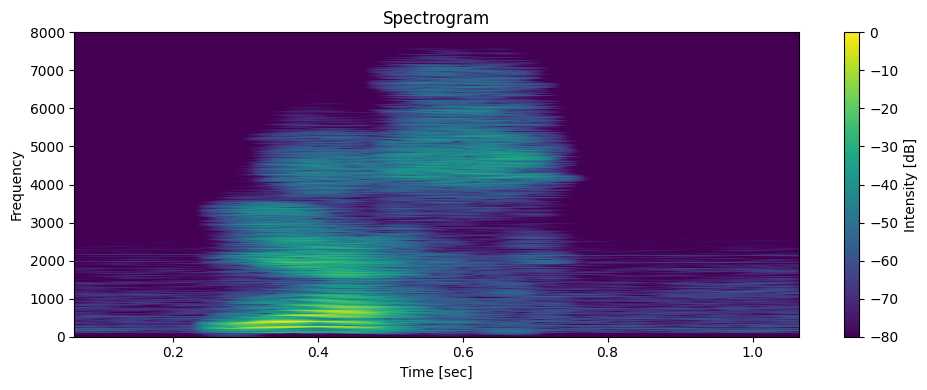

In [39]:
fig_spec_db_times = plot_spectrogram(
    f=frequencies,
    x=times,
    spec=S_db_caits,
    x_axis_name="time",
    return_mode=True
)

export_fig(fig_spec_db_times, export="show")

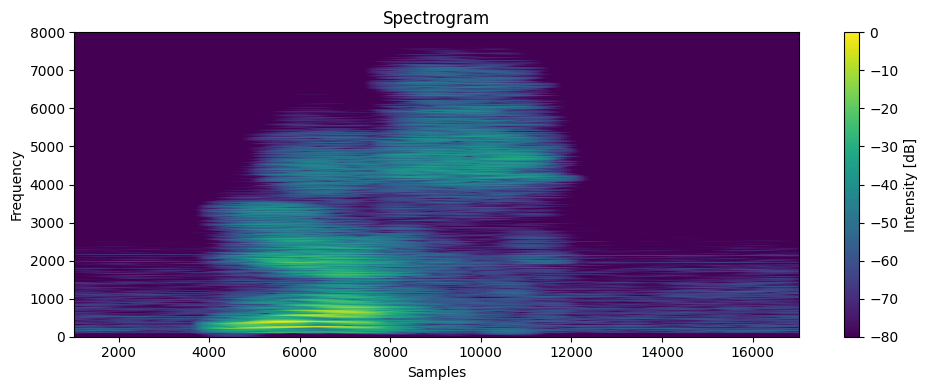

In [40]:
fig_spec_db_samples = plot_spectrogram(
    f=frequencies,
    x=samples,
    spec=S_db_caits,
    x_axis_name="samples",
    return_mode=True
)

export_fig(fig_spec_db_samples, export="show")


In [41]:
export_fig(
    fig_spec_db_samples,
    export="save",
    save_path="data",
    fig_id="fig_spec_db_samples",
    fig_extension="png",
    create_dir=True,
    print_debug=True
)

Figure saved to data/fig_spec_db_samples.png
